In [1]:
import re
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import StandardScaler
import seaborn as sns

In [2]:
data = pd.read_csv("train.csv")
data.Survived.mean()

0.3838383838383838

In [3]:
data["Sex_bool"] = data["Sex"] == "male"
data = data.drop(columns=["Sex"])
data.groupby("Sex_bool").Survived.mean()

Sex_bool
False    0.742038
True     0.188908
Name: Survived, dtype: float64

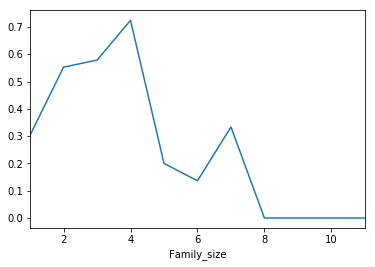

In [4]:
data["Family_size"] = data["SibSp"] + data["Parch"] + 1
data["Alone"] = data["Family_size"] == 1
data.groupby("Family_size").Survived.mean().plot()

In [5]:
data["in_cabin"] = data["Cabin"].isna() == False
data = data.drop(columns=["Cabin"])
data.groupby("in_cabin").Survived.mean()

in_cabin
False    0.299854
True     0.666667
Name: Survived, dtype: float64

In [6]:
data = data.drop(columns=["Ticket"])
data.head()

,PassengerId,Survived,Pclass,Name,Age,SibSp,Parch,Fare,Embarked,Sex_bool,Family_size,Alone,in_cabin
0,1,0,3,"Braund, Mr. Owen Harris",22.0,1,0,7.2500,S,True,2,False,False
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",38.0,1,0,71.2833,C,False,2,False,True
2,3,1,3,"Heikkinen, Miss. Laina",26.0,0,0,7.9250,S,False,1,True,False
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",35.0,1,0,53.1000,S,False,2,False,True
4,5,0,3,"Allen, Mr. William Henry",35.0,0,0,8.0500,S,True,1,True,False


,PassengerId,Survived,Pclass,Name,Age,SibSp,Parch,Fare,Sex_bool,Family_size,Alone,in_cabin,embarked_C,embarked_Q,embarked_S
0,1,0,3,"Braund, Mr. Owen Harris",22.0,1,0,7.2500,True,2,False,False,0,0,1
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",38.0,1,0,71.2833,False,2,False,True,1,0,0
2,3,1,3,"Heikkinen, Miss. Laina",26.0,0,0,7.9250,False,1,True,False,0,0,1
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",35.0,1,0,53.1000,False,2,False,True,0,0,1
4,5,0,3,"Allen, Mr. William Henry",35.0,0,0,8.0500,True,1,True,False,0,0,1


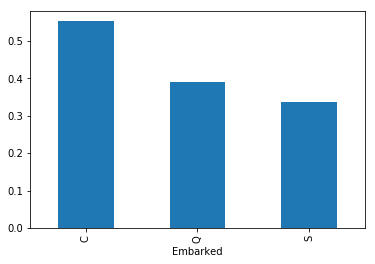

In [7]:
embarked = pd.get_dummies(data["Embarked"], prefix="embarked")
data = data.join(embarked)
data.groupby("Embarked").Survived.mean().plot.bar()
data = data.drop(columns=["Embarked"])
data.head()

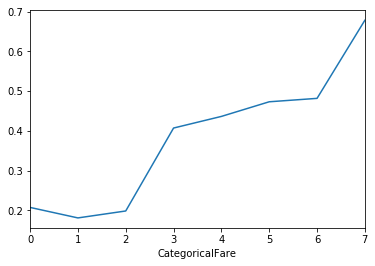

In [8]:
data['Fare'] = data['Fare'].fillna(data['Fare'].median())
data.head()
data['CategoricalFare'] = pd.qcut(data['Fare'], 8, labels=False)
data.groupby(data['CategoricalFare']).Survived.mean().plot()

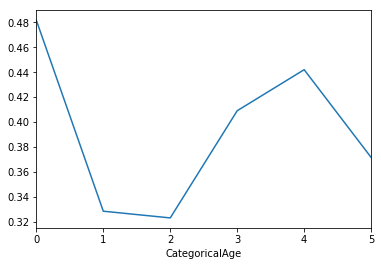

In [9]:
data['Age'] = data['Age'].fillna(data["Age"].mean())
data['Age'] = data['Age'].astype(int)
data['CategoricalAge'] = pd.qcut(data['Age'], 6, labels=False)
data.groupby(data.CategoricalAge).Survived.mean().plot()

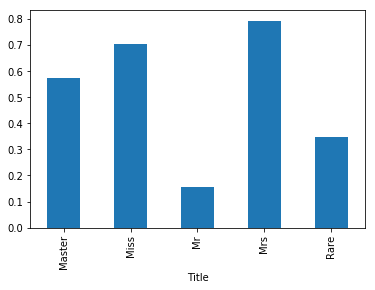

In [10]:
def get_title(name):
    title_search = re.search(' ([A-Za-z]+)\.', name)
    # If the title exists, extract and return it.
    if title_search:
        return title_search.group(1)
    return ""

data['Title'] = data['Name'].apply(get_title)
data['Title'] = data['Title'].replace(['Lady', 'Countess','Capt', 'Col',\
                                       'Don', 'Dr', 'Major', 'Rev', 'Sir', 'Jonkheer', 'Dona'], 'Rare')
data['Title'] = data['Title'].replace('Mlle', 'Miss')
data['Title'] = data['Title'].replace('Ms', 'Miss')
data['Title'] = data['Title'].replace('Mme', 'Mrs')

data.groupby('Title').Survived.mean().plot.bar()

title_mapping = {"Mr": 1, "Miss": 2, "Mrs": 3, "Master": 4, "Rare": 5}
data['Title'] = data['Title'].map(title_mapping)
data['Title'] = data['Title'].fillna(0)
data = data.drop(columns=["Name"])


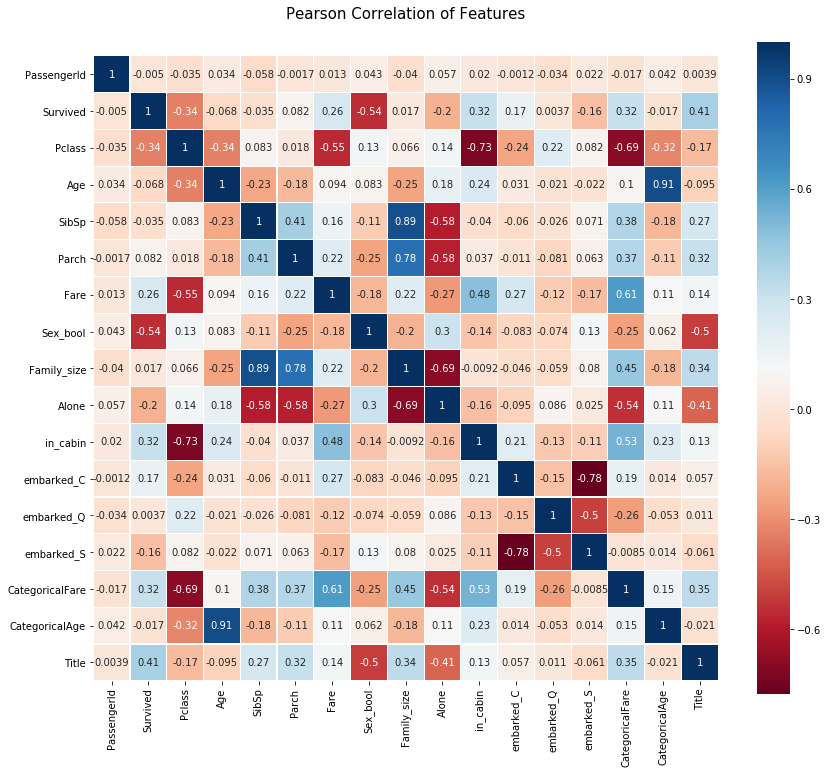

In [11]:
colormap = plt.cm.RdBu
plt.figure(figsize=(14, 12))
plt.title('Pearson Correlation of Features', y=1.05, size=15)
sns.heatmap(data.astype(float).corr(), linewidths=0.1, vmax=1.0,
            square=True, cmap=colormap, linecolor='white', annot=True)
plt.show()